In [6]:
import os
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
sns.set(font_scale=1.5)

In [7]:
base_path = r'C:\Users\James\Desktop\toronto-open-data-portal'

tcl_path = os.path.join(base_path, 'toronto-centreline-wgs84',
                       'CENTRELINE_WGS84.shp')


In [8]:
tcl = gpd.read_file(tcl_path)

print('CRS: ', tcl.crs)
print(tcl.shape)
tcl.head(3)

CRS:  epsg:4326
(69378, 18)


,GEO_ID,LFN_ID,LF_NAME,ADDRESS_L,ADDRESS_R,OE_FLAG_L,OE_FLAG_R,LONUML,HINUML,LONUMR,HINUMR,FNODE,TNODE,FCODE,FCODE_DESC,JURIS_CODE,OBJECTID,geometry
0,30079678,19155,Waterfront Trl,None,None,N,N,0,0,0,0,30079676,30079656,204001,Trail,CITY OF TORONTO,189008.0,"LINESTRING (-79.54478 43.58583, -79.54478 43.5..."
1,30079680,19166,Marie Curtis Park Trl,None,None,N,N,0,0,0,0,30079676,30079679,204001,Trail,CITY OF TORONTO,189011.0,"LINESTRING (-79.54478 43.58583, -79.54483 43.5..."
2,30079677,19155,Waterfront Trl,None,None,N,N,0,0,0,0,30008708,30079676,204001,Trail,CITY OF TORONTO,189009.0,"LINESTRING (-79.54454 43.58611, -79.54464 43.5..."


In [9]:
tcl = tcl.to_crs({'init':'epsg:3161'})

C:\anaconda3\envs\earth-analytics-python\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


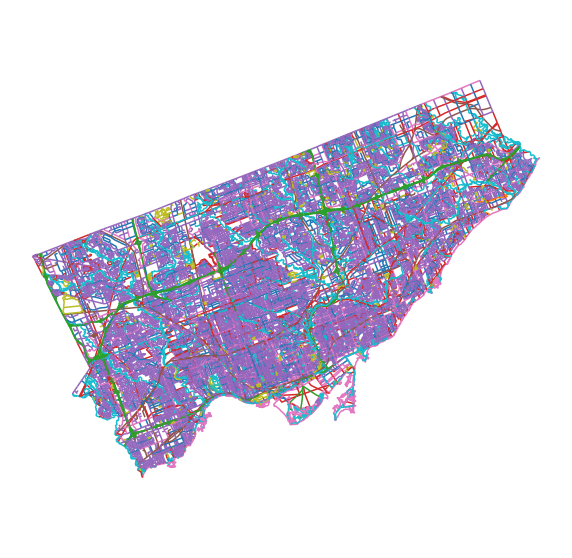

In [10]:
fig, ax = plt.subplots(figsize=(10,10))

tcl.plot(column='FCODE_DESC',
        ax=ax,
        legend=False)

#leg=ax.get_legend()
#leg.set_bbox_to_anchor((1.15, 1))

ax.set_axis_off()
plt.axis('equal')
plt.show();

In [11]:
lines_to_keep = ['River', 'Creek/Tributary', 'Major Arterial']

tcl = tcl[tcl['FCODE_DESC'].isin(lines_to_keep)]

In [12]:
tcl_palette = {'Creek/Tributary': 'cyan',
              'Major Arterial': 'black',
              'River': 'blue'}

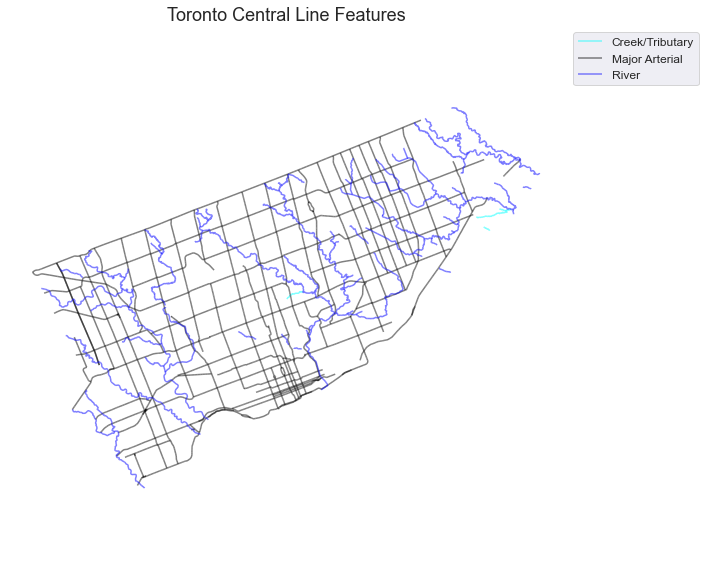

In [13]:
fig, ax = plt.subplots(figsize=(10,10))

for ctype, data in tcl.groupby('FCODE_DESC'):

    color = tcl_palette[ctype]
    
    data.plot(ax=ax,
             legend=True,
             color=color,
             label=ctype,
             alpha=0.5
             )

ax.legend(bbox_to_anchor=(1.25, 1), prop={'size':12})
ax.set(title='Toronto Central Line Features')

ax.set_axis_off()
plt.axis('equal')
plt.show();

## Polygon Features

In [14]:
neighborhoods_path = os.path.join(base_path,'toronto-nbrhoods-wgs84',
                                  'Neighbourhoods.shp')

ravines_path = os.path.join(base_path, 'toronto-ravine-wgs84',
                           'RAVINE_BYLAW_WGS84.shp')

landcover_path = os.path.join(base_path, 'toronto-land-cover',
                             'cotLandcover.shp')


In [15]:
nbrs = gpd.read_file(neighborhoods_path)
print('CRS: ', nbrs.crs)
print(nbrs.shape)
nbrs.head(3)

CRS:  epsg:4326
(140, 16)


,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_7,FIELD_8,FIELD_9,FIELD_10,FIELD_11,FIELD_12,FIELD_13,FIELD_14,FIELD_15,geometry
0,5601,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),None,None,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"POLYGON ((-79.43592 43.68015, -79.43492 43.680..."
1,5602,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),None,None,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"POLYGON ((-79.41096 43.70408, -79.40962 43.704..."
2,5603,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),None,None,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"POLYGON ((-79.39119 43.68108, -79.39141 43.680..."


In [16]:
nbrs = nbrs.to_crs({'init':'epsg:3161'})

C:\anaconda3\envs\earth-analytics-python\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


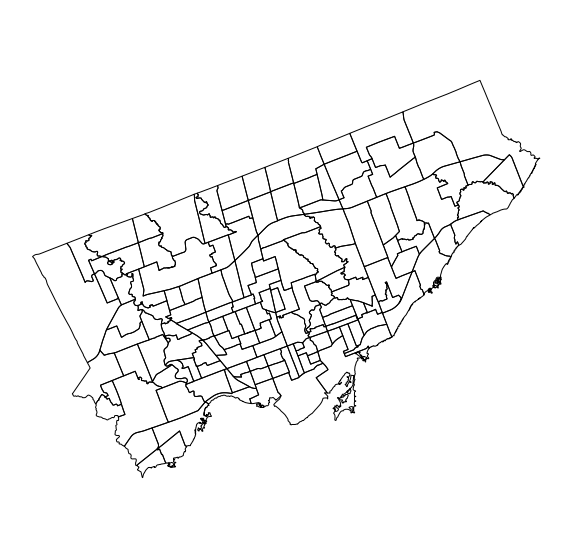

In [17]:
fig, ax = plt.subplots(figsize=(10,10))

nbrs.plot(ax=ax,
         edgecolor='black',
         facecolor='none',
         zorder=10)

ax.set_axis_off()
plt.axis('equal')
plt.show();

In [18]:
ravines = gpd.read_file(ravines_path)

print('CRS: ', ravines.crs)
print(ravines.shape)
ravines.head(3)

CRS:  epsg:4326
(854, 2)


,OBJECTID,geometry
0,9916273.0,"POLYGON ((-79.29737 43.69628, -79.29737 43.696..."
1,9916289.0,"MULTIPOLYGON (((-79.36794 43.68123, -79.36793 ..."
2,9916305.0,"MULTIPOLYGON (((-79.34456 43.69738, -79.34444 ..."


In [19]:
ravines = ravines.to_crs({'init': 'epsg:3161'})

C:\anaconda3\envs\earth-analytics-python\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


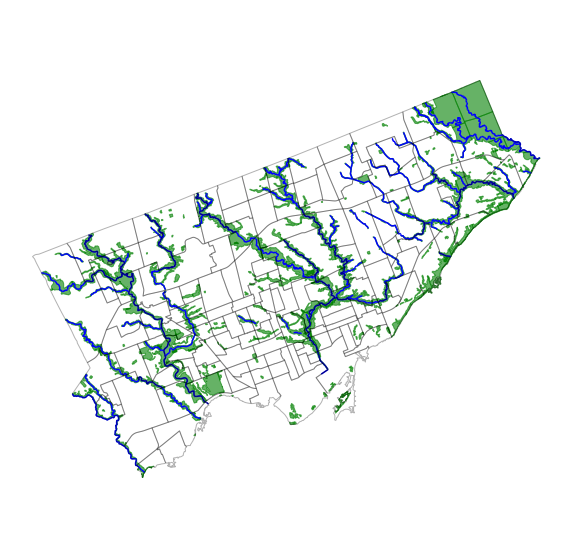

In [20]:
fig, ax = plt.subplots(figsize=(10,10))

nbrs.plot(ax=ax,
          alpha=.3,
          edgecolor='black',
          facecolor='none',
          zorder=10)

tcl[tcl['FCODE_DESC'].isin(['River'])].plot(ax=ax,
                                           edgecolor='blue',
                                           alpha=1)

ravines.plot(ax=ax,
             alpha=.6,
             facecolor='green',
             edgecolor='green')

ax.set_axis_off()
plt.axis('equal')
plt.show();

In [ ]:
# the shapefile is relatively large - better performance if opened using command line
landcover = gpd.read_file(landcover_path)

In [ ]:
print('CRS: ', landcover.crs)
print(landcover.shape)
landcover.head(3)

In [ ]:
landcover.to_crs({'init': 'epsg:3161'})

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

landcover.plot(ax=ax,
              legend=True,
              column)